<a href="https://colab.research.google.com/github/HChandeepa/Reddit-posts-on-the-Israel-Palestine-War-War/blob/Master/Reddit_Israel_and__Gaza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Israel_Gaza_War_Reddit_Data_Optimized_with_Comments1 - Copy.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.isna().sum().sum()

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum().sum()

## Task 2: Text Preprocessing and Tokenization


In [ ]:
import spacy
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.util import ngrams

In [ ]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess_with_spacy(text):
    if isinstance(text, str):  # Check if the input is a string
        doc = nlp(text)  # Process text with SpaCy
        tokens = [
            token.lemma_  # Lemmatize each word
            for token in doc
            if not token.is_stop and token.is_alpha  # Remove stopwords and special characters
        ]
        return tokens  # Return tokens as a list
    return []  # Return an empty list for missing or invalid input

In [ ]:
# Apply preprocessing and tokenization
df['Tokenized_Text'] = df['Comment_Text'].apply(preprocess_with_spacy)

In [ ]:
print(df[['Comment_Text', 'Tokenized_Text']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...  
1  [long, game, week, Israel, obliterate, norther...  
2        [good, job, diplomat, change, Isreal, mind]  
3  [crucial, position, advance, humanitarian, cor...  
4  [everybody, hate, United, States, time, United...  


In [ ]:
print("Missing values in Preprocessed_Comment_Text:", df['Tokenized_Text'].isnull().sum())

Missing values in Preprocessed_Comment_Text: 0


In [ ]:
print(df['Tokenized_Text'].dropna().head())

0    [CNN, israeli, Prime, Minister, Benjamin, Neta...
1    [long, game, week, Israel, obliterate, norther...
2          [good, job, diplomat, change, Isreal, mind]
3    [crucial, position, advance, humanitarian, cor...
4    [everybody, hate, United, States, time, United...
Name: Tokenized_Text, dtype: object


In [ ]:
for i in range(5):  # Adjust range for more samples
    original = df['Comment_Text'].iloc[i]
    processed = df['Tokenized_Text'].iloc[i]
    print(f"Original: {original}")
    print(f"Processed: {processed}")
    print("-----------")

Original: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Processed: ['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 

In [ ]:
# Intialize Stemmer
Stemmer = PorterStemmer()

In [ ]:
def stem_with_nltk(tokens):
    if isinstance(tokens, list):  # Ensure the input is a list
        return [Stemmer.stem(token) for token in tokens]
    return []  # Return an empty list for invalid input


In [ ]:
df['Stemmed_Text'] = df['Tokenized_Text'].apply(stem_with_nltk)

In [ ]:
print(df[['Comment_Text', 'Tokenized_Text', 'Stemmed_Text']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                        Stemmed_Text  
0  [cnn, isra, prime, minist, benjamin, netanyahu...  
1  [long, game, week, israel, obliter, northern, ...  
2         [good, job, diplomat, chang, isreal, mind]  
3  [crucial, posit, advanc, humanitarian, corrido...  
4  [everybodi, hate, unit, state, time, unit, sta..

In [ ]:
# Generate n-grams
def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['Bigrams'] = df['Stemmed_Text'].apply(lambda tokens: generate_ngrams(tokens, 2))
df['Trigrams'] = df['Stemmed_Text'].apply(lambda tokens: generate_ngrams(tokens, 3))

In [ ]:
# Display the original tokens and n-grams for verification
for i in range(5):  # Adjust the range to inspect more rows
    print(f"Row {i + 1}:")
    print(f"Original Tokens: {df['Stemmed_Text'].iloc[i]}")
    print(f"Bigrams: {df['Bigrams'].iloc[i]}")
    print(f"Trigrams: {df['Trigrams'].iloc[i]}")
    print("-" * 50)


Row 1:
Original Tokens: ['cnn', 'isra', 'prime', 'minist', 'benjamin', 'netanyahu', 'offic', 'tell', 'cnn', 'sunday', 'israel', 'restor', 'water', 'southern', 'gaza', 'director', 'palestinian', 'water', 'author', 'say', 'sure', 'true', 'electr', 'restor', 'confirm', 'moment', 'water', 'station', 'khan', 'youni', 'gaza', 'citi', 'central', 'gaza', 'condit', 'receiv', 'distribut', 'water', 'peopl', 'munther', 'shublaq', 'director', 'water', 'author', 'gaza', 'tell', 'cnn', 'enabl', 'station', 'receiv', 'distribut', 'water', 'need', 'electr', 'current', 'cut', 'altern', 'fuel', 'power', 'gener', 'pressur', 'restor', 'water', 'suppli', 'confirm', 'station', 'readi']
Bigrams: [('cnn', 'isra'), ('isra', 'prime'), ('prime', 'minist'), ('minist', 'benjamin'), ('benjamin', 'netanyahu'), ('netanyahu', 'offic'), ('offic', 'tell'), ('tell', 'cnn'), ('cnn', 'sunday'), ('sunday', 'israel'), ('israel', 'restor'), ('restor', 'water'), ('water', 'southern'), ('southern', 'gaza'), ('gaza', 'director'), 

In [ ]:
print(df[['Stemmed_Text', 'Bigrams', 'Trigrams']].head())

                                        Stemmed_Text  \
0  [cnn, isra, prime, minist, benjamin, netanyahu...   
1  [long, game, week, israel, obliter, northern, ...   
2         [good, job, diplomat, chang, isreal, mind]   
3  [crucial, posit, advanc, humanitarian, corrido...   
4  [everybodi, hate, unit, state, time, unit, sta...   

                                             Bigrams  \
0  [(cnn, isra), (isra, prime), (prime, minist), ...   
1  [(long, game), (game, week), (week, israel), (...   
2  [(good, job), (job, diplomat), (diplomat, chan...   
3  [(crucial, posit), (posit, advanc), (advanc, h...   
4  [(everybodi, hate), (hate, unit), (unit, state...   

                                            Trigrams  
0  [(cnn, isra, prime), (isra, prime, minist), (p...  
1  [(long, game, week), (game, week, israel), (we...  
2  [(good, job, diplomat), (job, diplomat, chang)...  
3  [(crucial, posit, advanc), (posit, advanc, hum...  
4  [(everybodi, hate, unit), (hate, unit, state),..

In [ ]:
# Convert n-grams to readable strings for easier verification
df['Readable_Bigrams'] = df['Bigrams'].apply(lambda bigrams: [' '.join(bigram) for bigram in bigrams])
df['Readable_Trigrams'] = df['Trigrams'].apply(lambda trigrams: [' '.join(trigram) for trigram in trigrams])

# Display the readable n-grams
print(df[['Stemmed_Text', 'Readable_Bigrams', 'Readable_Trigrams']].head())

                                        Stemmed_Text  \
0  [cnn, isra, prime, minist, benjamin, netanyahu...   
1  [long, game, week, israel, obliter, northern, ...   
2         [good, job, diplomat, chang, isreal, mind]   
3  [crucial, posit, advanc, humanitarian, corrido...   
4  [everybodi, hate, unit, state, time, unit, sta...   

                                    Readable_Bigrams  \
0  [cnn isra, isra prime, prime minist, minist be...   
1  [long game, game week, week israel, israel obl...   
2  [good job, job diplomat, diplomat chang, chang...   
3  [crucial posit, posit advanc, advanc humanitar...   
4  [everybodi hate, hate unit, unit state, state ...   

                                   Readable_Trigrams  
0  [cnn isra prime, isra prime minist, prime mini...  
1  [long game week, game week israel, week israel...  
2  [good job diplomat, job diplomat chang, diplom...  
3  [crucial posit advanc, posit advanc humanitari...  
4  [everybodi hate unit, hate unit state, unit st..

After using stemming some words important parts are dropped. Therefore , I am going to use lemmatization now.

In [ ]:
def preprocess_with_spacy(text):
    if isinstance(text, str):
        doc = nlp(text)
        tokens = [
            token.lemma_  # Use SpaCy's lemmatization
            for token in doc
            if not token.is_stop and token.is_alpha  # Remove stopwords and punctuation
        ]
        return tokens  # Return a list of lemmatized tokens
    return []

In [ ]:
# Apply preprocessing and tokenization
df['Tokenized_Text'] = df['Comment_Text'].apply(preprocess_with_spacy)

In [ ]:
print(df[['Comment_Text', 'Tokenized_Text']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Tokenized_Text  
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...  
1  [long, game, week, Israel, obliterate, norther...  
2        [good, job, diplomat, change, Isreal, mind]  
3  [crucial, position, advance, humanitarian, cor...  
4  [everybody, hate, United, States, time, United...  


In [ ]:
print("Missing values in Preprocessed_Comment_Text:", df['Tokenized_Text'].isnull().sum())

Missing values in Preprocessed_Comment_Text: 0


In [ ]:
print(df['Tokenized_Text'].dropna().head())

0    [CNN, israeli, Prime, Minister, Benjamin, Neta...
1    [long, game, week, Israel, obliterate, norther...
2          [good, job, diplomat, change, Isreal, mind]
3    [crucial, position, advance, humanitarian, cor...
4    [everybody, hate, United, States, time, United...
Name: Tokenized_Text, dtype: object


In [ ]:
for i in range(5):  # Adjust range for more samples
    original = df['Comment_Text'].iloc[i]
    processed = df['Tokenized_Text'].iloc[i]
    print(f"Original: {original}")
    print(f"Processed: {processed}")
    print("-----------")

Original: As per CNN

Israeli Prime Minister Benjamin Netanyahu’s office told CNN Sunday Israel has restored water to southern Gaza, but the director of the Palestinian Water Authority said he could not be sure it was true, because electricity has not been restored.

“I cannot confirm this at the moment because our water stations in Khan Younis, Gaza City, and central Gaza are not in a condition to receive and distribute water to the people,” Munther Shublaq, the director of the Water Authority in Gaza, told CNN.
“To enable the stations to receive and distribute water, we need electricity, which is currently cut off. The alternative is fuel to power the generator, which we also do not have. There may be pressure to restore the water supply, but I cannot confirm anything until the stations are ready.”
Processed: ['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 

In [ ]:
# Generate n-grams
df['Bigrams'] = df['Tokenized_Text'].apply(lambda tokens: generate_ngrams(tokens, 2))
df['Trigrams'] = df['Tokenized_Text'].apply(lambda tokens: generate_ngrams(tokens, 3))

In [ ]:
# Display the original tokens and n-grams for verification
for i in range(5):  # Adjust the range to inspect more rows
    print(f"Row {i + 1}:")
    print(f"Original Tokens: {df['Tokenized_Text'].iloc[i]}")
    print(f"Bigrams: {df['Bigrams'].iloc[i]}")
    print(f"Trigrams: {df['Trigrams'].iloc[i]}")
    print("-" * 50)


Row 1:
Original Tokens: ['CNN', 'israeli', 'Prime', 'Minister', 'Benjamin', 'Netanyahu', 'office', 'tell', 'CNN', 'Sunday', 'Israel', 'restore', 'water', 'southern', 'Gaza', 'director', 'Palestinian', 'Water', 'Authority', 'say', 'sure', 'true', 'electricity', 'restore', 'confirm', 'moment', 'water', 'station', 'Khan', 'Younis', 'Gaza', 'City', 'central', 'Gaza', 'condition', 'receive', 'distribute', 'water', 'people', 'Munther', 'Shublaq', 'director', 'Water', 'Authority', 'Gaza', 'tell', 'CNN', 'enable', 'station', 'receive', 'distribute', 'water', 'need', 'electricity', 'currently', 'cut', 'alternative', 'fuel', 'power', 'generator', 'pressure', 'restore', 'water', 'supply', 'confirm', 'station', 'ready']
Bigrams: [('CNN', 'israeli'), ('israeli', 'Prime'), ('Prime', 'Minister'), ('Minister', 'Benjamin'), ('Benjamin', 'Netanyahu'), ('Netanyahu', 'office'), ('office', 'tell'), ('tell', 'CNN'), ('CNN', 'Sunday'), ('Sunday', 'Israel'), ('Israel', 'restore'), ('restore', 'water'), ('wate

In [ ]:
print(df[['Tokenized_Text', 'Bigrams', 'Trigrams']].head())

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                             Bigrams  \
0  [(CNN, israeli), (israeli, Prime), (Prime, Min...   
1  [(long, game), (game, week), (week, Israel), (...   
2  [(good, job), (job, diplomat), (diplomat, chan...   
3  [(crucial, position), (position, advance), (ad...   
4  [(everybody, hate), (hate, United), (United, S...   

                                            Trigrams  
0  [(CNN, israeli, Prime), (israeli, Prime, Minis...  
1  [(long, game, week), (game, week, Israel), (we...  
2  [(good, job, diplomat), (job, diplomat, change...  
3  [(crucial, position, advance), (position, adva...  
4  [(everybody, hate, United), (hate, United, Sta..

In [ ]:
# Convert n-grams to readable strings for easier verification
df['Readable_Bigrams'] = df['Bigrams'].apply(lambda bigrams: [' '.join(bigram) for bigram in bigrams])
df['Readable_Trigrams'] = df['Trigrams'].apply(lambda trigrams: [' '.join(trigram) for trigram in trigrams])

# Display the readable n-grams
print(df[['Tokenized_Text', 'Readable_Bigrams', 'Readable_Trigrams']].head())

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                    Readable_Bigrams  \
0  [CNN israeli, israeli Prime, Prime Minister, M...   
1  [long game, game week, week Israel, Israel obl...   
2  [good job, job diplomat, diplomat change, chan...   
3  [crucial position, position advance, advance h...   
4  [everybody hate, hate United, United States, S...   

                                   Readable_Trigrams  
0  [CNN israeli Prime, israeli Prime Minister, Pr...  
1  [long game week, game week Israel, week Israel...  
2  [good job diplomat, job diplomat change, diplo...  
3  [crucial position advance, position advance hu...  
4  [everybody hate United, hate United States, Un..

## Task 3: POS Tagging and Named Entity Recognition (NER)

Part-of-Speech (POS) Tagging
Objective:
Identify the part of speech (e.g., noun, verb, adjective) for each word in the preprocessed text and determine the most common POS tags.

In [ ]:
def pos_tagging(text):
  doc = nlp(" ".join(text)) # Convert list of strings into single string
  return [(token.text, token.pos_) for token in doc] # Return tokens and their POS Tags


In [ ]:
# Apply POS tagging to the tokenized text
df['POS_Tags'] = df['Tokenized_Text'].apply(pos_tagging)

In [ ]:
print(df[['Tokenized_Text', 'POS_Tags']].head())

                                      Tokenized_Text  \
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...   
1  [long, game, week, Israel, obliterate, norther...   
2        [good, job, diplomat, change, Isreal, mind]   
3  [crucial, position, advance, humanitarian, cor...   
4  [everybody, hate, United, States, time, United...   

                                            POS_Tags  
0  [(CNN, PROPN), (israeli, ADJ), (Prime, PROPN),...  
1  [(long, ADJ), (game, NOUN), (week, NOUN), (Isr...  
2  [(good, ADJ), (job, NOUN), (diplomat, NOUN), (...  
3  [(crucial, ADJ), (position, NOUN), (advance, N...  
4  [(everybody, PRON), (hate, VERB), (United, PRO...  


In [ ]:
# count of POS Frequencies
from collections import Counter
# Flatten list of POS tags
all_pos_tags = [pos for tags in df['POS_Tags'] for _, pos in tags]
pos_counts = Counter(all_pos_tags)

# Display the most common POS tags
print("Most common POS tags:")
for tag, count in pos_counts.most_common():
    print(f"{tag}: {count}")

Most common POS tags:
NOUN: 144578
VERB: 66618
PROPN: 65067
ADJ: 55880
ADV: 15853
ADP: 2938
INTJ: 2065
AUX: 1842
NUM: 1328
X: 659
PART: 626
SCONJ: 576
PRON: 327
CCONJ: 65
DET: 37
PUNCT: 20
SYM: 10


Named Entity Recognition (NER)
Objective:
Identify named entities (e.g., people, organizations, locations, dates) in the comments.

In [ ]:
def ner_extraction(text):
  doc = nlp(" ".join(text)) # Convert list of tokens into a single string
  return [(ent.text, ent.label_) for ent in doc.ents] # Extract entity texct and label


In [ ]:
df['Entities'] = df['Tokenized_Text'].apply(ner_extraction)

In [ ]:
df[['Tokenized_Text', 'Entities']].head()

,Tokenized_Text,Entities
0,"[CNN, israeli, Prime, Minister, Benjamin, Neta...","[(CNN, ORG), (israeli, NORP), (Benjamin Netany..."
1,"[long, game, week, Israel, obliterate, norther...","[(Israel, GPE), (Gaza, GPE), (Hamas, ORG), (ha..."
2,"[good, job, diplomat, change, Isreal, mind]",[]
3,"[crucial, position, advance, humanitarian, cor...","[(Palestinians, NORP)]"
4,"[everybody, hate, United, States, time, United...","[(United States, GPE), (United States, GPE)]"


In [ ]:
# Flatten the list of entities
all_entities = [entity for entities in df['Entities'] for entity in entities]
entity_counts = Counter([ent[1] for ent in all_entities])  # Count by entity type

# Display the most common entity types
print("Most Common Entity Types:")
for entity_type, count in entity_counts.most_common():
    print(f"{entity_type}: {count}")


Most Common Entity Types:
GPE: 16322
NORP: 15516
ORG: 10467
PERSON: 3653
DATE: 2235
CARDINAL: 984
LOC: 727
ORDINAL: 182
EVENT: 156
PRODUCT: 147
TIME: 121
FAC: 93
WORK_OF_ART: 56
LANGUAGE: 52
MONEY: 42
QUANTITY: 18
LAW: 14
PERCENT: 3


In [ ]:
person_entities = [ent[0] for ent in all_entities if ent[1] == "PERSON"]
print("Most Common PERSON Entities:", Counter(person_entities).most_common(10))

Most Common PERSON Entities: [('Netanyahu', 318), ('Biden', 140), ('Bibi', 93), ('Gazan', 48), ('Oct', 36), ('Nakba', 33), ('Jordan', 32), ('Arafat', 29), ('Jew', 28), ('Putin', 28)]


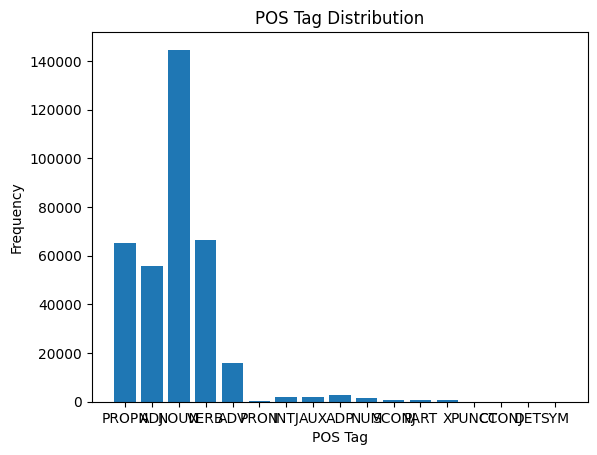

In [ ]:
import matplotlib.pyplot as plt

# Bar plot of POS frequencies
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution")
plt.xlabel("POS Tag")
plt.ylabel("Frequency")
plt.show()

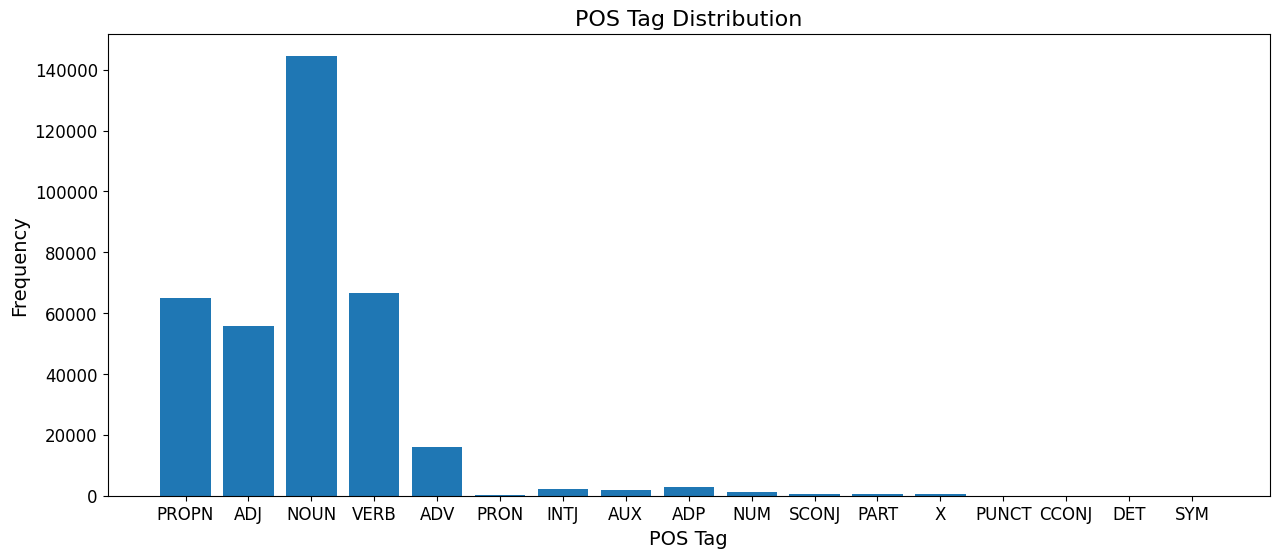

In [ ]:
import matplotlib.pyplot as plt

# Adjust figure size
plt.figure(figsize=(15, 6))  # Width = 10, Height = 6 (in inches)

# Bar plot of POS frequencies
plt.bar(pos_counts.keys(), pos_counts.values())
plt.title("POS Tag Distribution", fontsize=16)  # Larger title font
plt.xlabel("POS Tag", fontsize=14)  # Larger x-axis label font
plt.ylabel("Frequency", fontsize=14)  # Larger y-axis label font
plt.xticks(fontsize=12)  # Larger x-tick labels
plt.yticks(fontsize=12)  # Larger y-tick labels
plt.show()


## Task 4: Sentiment Analysis


In [ ]:
import nltk

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Sentiment Analysis using VADER (Valence Aware Dictionary for Sentiment Reasoning)
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Intialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to classify sentiment based on compound score
def vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Vader_Sentiment'] = df['Comment_Text'].apply(vader_sentiment)

In [ ]:
df.head()

,Post_Title,Comment_Text,Comment_Upvotes,Comment_Created_Date,Tokenized_Text,Stemmed_Text,Bigrams,Trigrams,Readable_Bigrams,Readable_Trigrams,POS_Tags,Entities,Vader_Sentiment
0,Israel resumes water supply to southern Gaza a...,As per CNN\n\nIsraeli Prime Minister Benjamin ...,4628.0,10/15/2023 17:52,"[CNN, israeli, Prime, Minister, Benjamin, Neta...","[cnn, isra, prime, minist, benjamin, netanyahu...","[(CNN, israeli), (israeli, Prime), (Prime, Min...","[(CNN, israeli, Prime), (israeli, Prime, Minis...","[CNN israeli, israeli Prime, Prime Minister, M...","[CNN israeli Prime, israeli Prime Minister, Pr...","[(CNN, PROPN), (israeli, ADJ), (Prime, PROPN),...","[(CNN, ORG), (israeli, NORP), (Benjamin Netany...",Positive
1,Israel resumes water supply to southern Gaza a...,What’s the long game here?(3ish weeks) does Is...,703.0,10/15/2023 16:54,"[long, game, week, Israel, obliterate, norther...","[long, game, week, israel, obliter, northern, ...","[(long, game), (game, week), (week, Israel), (...","[(long, game, week), (game, week, Israel), (we...","[long game, game week, week Israel, Israel obl...","[long game week, game week Israel, week Israel...","[(long, ADJ), (game, NOUN), (week, NOUN), (Isr...","[(Israel, GPE), (Gaza, GPE), (Hamas, ORG), (ha...",Negative
2,Israel resumes water supply to southern Gaza a...,Good job to U.S. diplomats for changing Isreal...,5684.0,10/15/2023 16:24,"[good, job, diplomat, change, Isreal, mind]","[good, job, diplomat, chang, isreal, mind]","[(good, job), (job, diplomat), (diplomat, chan...","[(good, job, diplomat), (job, diplomat, change...","[good job, job diplomat, diplomat change, chan...","[good job diplomat, job diplomat change, diplo...","[(good, ADJ), (job, NOUN), (diplomat, NOUN), (...",[],Positive
3,Israel resumes water supply to southern Gaza a...,The US is in a crucial position to advance the...,1805.0,10/15/2023 16:44,"[crucial, position, advance, humanitarian, cor...","[crucial, posit, advanc, humanitarian, corrido...","[(crucial, position), (position, advance), (ad...","[(crucial, position, advance), (position, adva...","[crucial position, position advance, advance h...","[crucial position advance, position advance hu...","[(crucial, ADJ), (position, NOUN), (advance, N...","[(Palestinians, NORP)]",Positive
4,Israel resumes water supply to southern Gaza a...,Everybody hates the United States until it’s t...,230.0,10/15/2023 20:14,"[everybody, hate, United, States, time, United...","[everybodi, hate, unit, state, time, unit, sta...","[(everybody, hate), (hate, United), (United, S...","[(everybody, hate, United), (hate, United, Sta...","[everybody hate, hate United, United States, S...","[everybody hate United, hate United States, Un...","[(everybody, PRON), (hate, VERB), (United, PRO...","[(United States, GPE), (United States, GPE)]",Positive


In [ ]:
from textblob import TextBlob

# Function to classify sentiment based on polarity
def textblob_sentiment(text):
  polarity = TextBlob(text).sentiment.polarity
  if polarity > 0:
    return 'Positive'
  elif polarity < 0:
    return 'Negative'
  else:
    return 'Neutral'

In [ ]:
df['TextBlob_sentiment'] = df['Comment_Text'].apply(textblob_sentiment)

In [ ]:
df.head()

,Post_Title,Comment_Text,Comment_Upvotes,Comment_Created_Date,Tokenized_Text,Stemmed_Text,Bigrams,Trigrams,Readable_Bigrams,Readable_Trigrams,POS_Tags,Entities,Vader_Sentiment,TextBlob_sentiment
0,Israel resumes water supply to southern Gaza a...,As per CNN\n\nIsraeli Prime Minister Benjamin ...,4628.0,10/15/2023 17:52,"[CNN, israeli, Prime, Minister, Benjamin, Neta...","[cnn, isra, prime, minist, benjamin, netanyahu...","[(CNN, israeli), (israeli, Prime), (Prime, Min...","[(CNN, israeli, Prime), (israeli, Prime, Minis...","[CNN israeli, israeli Prime, Prime Minister, M...","[CNN israeli Prime, israeli Prime Minister, Pr...","[(CNN, PROPN), (israeli, ADJ), (Prime, PROPN),...","[(CNN, ORG), (israeli, NORP), (Benjamin Netany...",Positive,Positive
1,Israel resumes water supply to southern Gaza a...,What’s the long game here?(3ish weeks) does Is...,703.0,10/15/2023 16:54,"[long, game, week, Israel, obliterate, norther...","[long, game, week, israel, obliter, northern, ...","[(long, game), (game, week), (week, Israel), (...","[(long, game, week), (game, week, Israel), (we...","[long game, game week, week Israel, Israel obl...","[long game week, game week Israel, week Israel...","[(long, ADJ), (game, NOUN), (week, NOUN), (Isr...","[(Israel, GPE), (Gaza, GPE), (Hamas, ORG), (ha...",Negative,Negative
2,Israel resumes water supply to southern Gaza a...,Good job to U.S. diplomats for changing Isreal...,5684.0,10/15/2023 16:24,"[good, job, diplomat, change, Isreal, mind]","[good, job, diplomat, chang, isreal, mind]","[(good, job), (job, diplomat), (diplomat, chan...","[(good, job, diplomat), (job, diplomat, change...","[good job, job diplomat, diplomat change, chan...","[good job diplomat, job diplomat change, diplo...","[(good, ADJ), (job, NOUN), (diplomat, NOUN), (...",[],Positive,Positive
3,Israel resumes water supply to southern Gaza a...,The US is in a crucial position to advance the...,1805.0,10/15/2023 16:44,"[crucial, position, advance, humanitarian, cor...","[crucial, posit, advanc, humanitarian, corrido...","[(crucial, position), (position, advance), (ad...","[(crucial, position, advance), (position, adva...","[crucial position, position advance, advance h...","[crucial position advance, position advance hu...","[(crucial, ADJ), (position, NOUN), (advance, N...","[(Palestinians, NORP)]",Positive,Positive
4,Israel resumes water supply to southern Gaza a...,Everybody hates the United States until it’s t...,230.0,10/15/2023 20:14,"[everybody, hate, United, States, time, United...","[everybodi, hate, unit, state, time, unit, sta...","[(everybody, hate), (hate, United), (United, S...","[(everybody, hate, United), (hate, United, Sta...","[everybody hate, hate United, United States, S...","[everybody hate United, hate United States, Un...","[(everybody, PRON), (hate, VERB), (United, PRO...","[(United States, GPE), (United States, GPE)]",Positive,Neutral


In [ ]:
from transformers import pipeline

bert_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")


# initialize a sentiment analysis piepline use Pre-Trained BERT model

# Function to extract sentiment using BERT
def bert_sentiment(text):
    result = bert_analyzer(text[:512])[0]  # Truncate text to max 512 tokens
    return result['label']

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
df['BERT_Sentiments'] = df['Comment_Text'].apply(bert_sentiment)

In [ ]:
df[['Comment_Text','Vader_Sentiment','TextBlob_sentiment','BERT_Sentiments']].head()

,Comment_Text,Vader_Sentiment,TextBlob_sentiment,BERT_Sentiments
0,As per CNN\n\nIsraeli Prime Minister Benjamin ...,Positive,Positive,NEGATIVE
1,What’s the long game here?(3ish weeks) does Is...,Negative,Negative,NEGATIVE
2,Good job to U.S. diplomats for changing Isreal...,Positive,Positive,POSITIVE
3,The US is in a crucial position to advance the...,Positive,Positive,POSITIVE
4,Everybody hates the United States until it’s t...,Positive,Neutral,NEGATIVE


<ipython-input-56-25d63cefc7ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


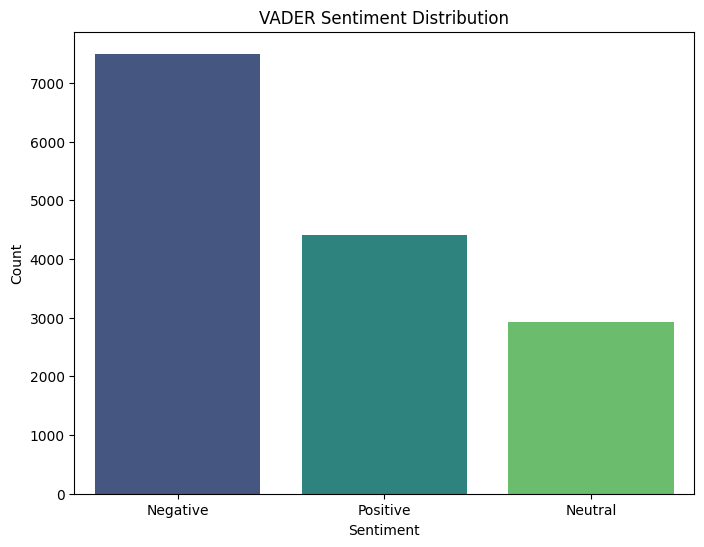

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['Vader_Sentiment'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("VADER Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-57-056e6d4c72e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


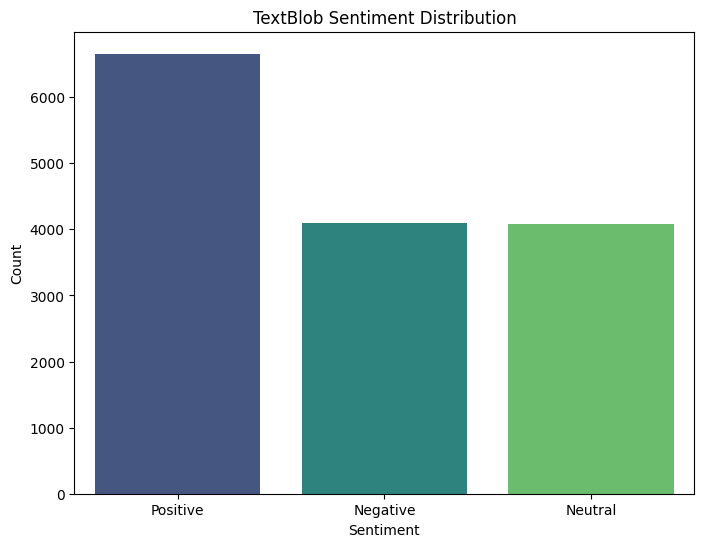

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['TextBlob_sentiment'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("TextBlob Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

<ipython-input-58-5a99ddc0b1f9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")


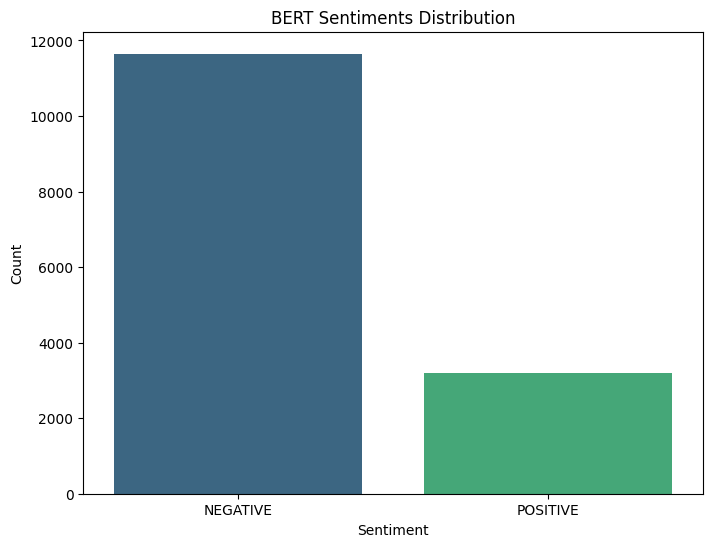

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count sentiment values for VADER
vader_counts = df['BERT_Sentiments'].value_counts()

# Bar plot for VADER sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=vader_counts.index, y=vader_counts.values, palette="viridis")
plt.title("BERT Sentiments Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [ ]:
df['Comment_Created_Date'] = pd.to_datetime(df['Comment_Created_Date'])

In [61]:
# Group by date and calculate sentiment counts
sentiment_trends = df.groupby([df['Comment_Created_Date'].dt.date, 'Vader_Sentiment']).size().unstack(fill_value=0)
# Calculate propotion6 for each sen6timent
sentiment_trends = sentiment_trends.div(sentiment_trends.sum(axis=1), axis=0)

# Reset index for visualization
sentiment_trends.reset_index(inplace=True)

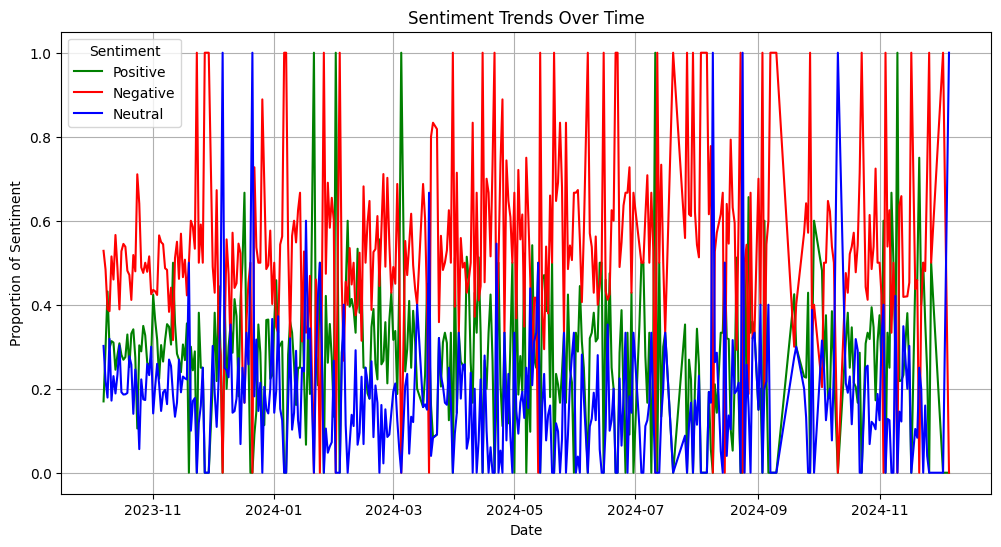

In [62]:
import matplotlib.pyplot as plt

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Neutral'], label='Neutral', color='blue')

plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

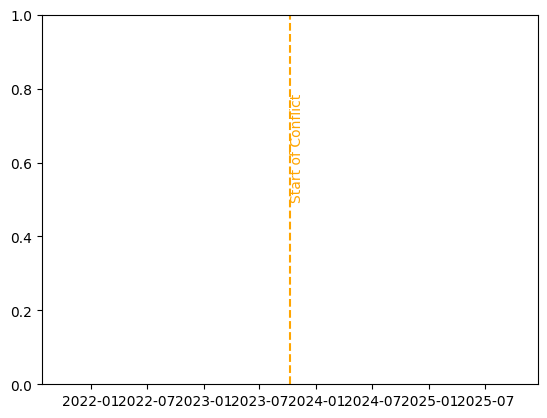

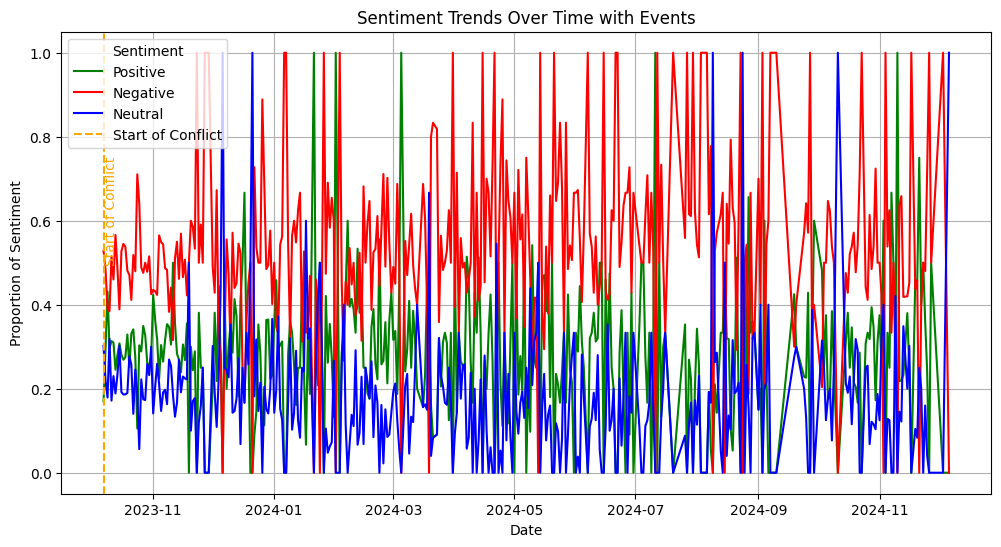

In [63]:
# Add vertical lines for real-world events
plt.axvline(pd.to_datetime('2023-10-07'), color='orange', linestyle='--', label='Start of Conflict')
plt.text(pd.to_datetime('2023-10-07'), 0.5, 'Start of Conflict', rotation=90, color='orange')

# Re-plot the trends with annotations
plt.figure(figsize=(12, 6))
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Positive'], label='Positive', color='green')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Negative'], label='Negative', color='red')
plt.plot(sentiment_trends['Comment_Created_Date'], sentiment_trends['Neutral'], label='Neutral', color='blue')

plt.axvline(pd.to_datetime('2023-10-07'), color='orange', linestyle='--', label='Start of Conflict')
plt.text(pd.to_datetime('2023-10-07'), 0.5, 'Start of Conflict', rotation=90, color='orange')

plt.title("Sentiment Trends Over Time with Events")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()

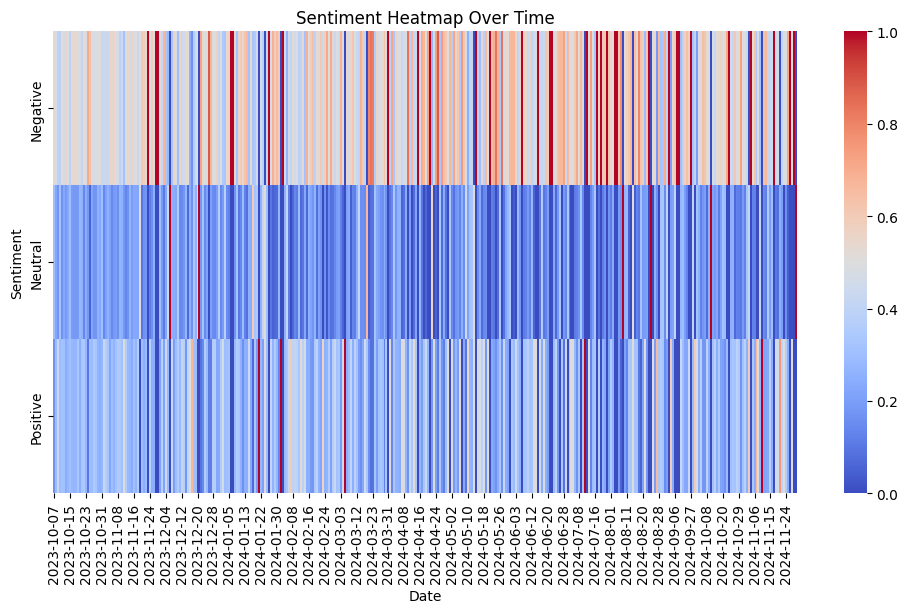

In [64]:
import seaborn as sns

# Create a heatmap for sentiment proportions
plt.figure(figsize=(12, 6))
sns.heatmap(sentiment_trends.set_index('Comment_Created_Date').T, cmap='coolwarm', annot=False, cbar=True)

plt.title("Sentiment Heatmap Over Time")
plt.xlabel("Date")
plt.ylabel("Sentiment")
plt.show()

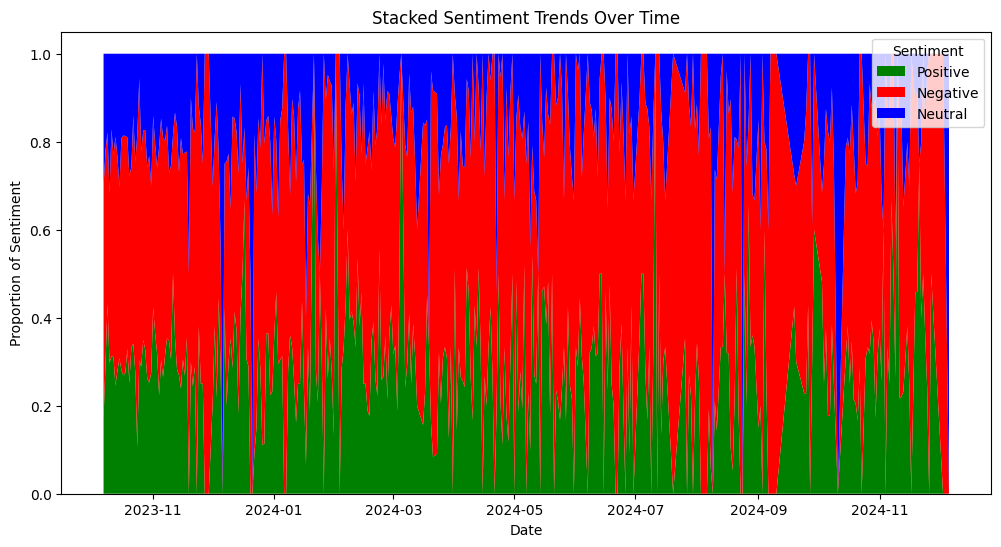

In [65]:
# Plot stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(
    sentiment_trends['Comment_Created_Date'],
    sentiment_trends['Positive'],
    sentiment_trends['Negative'],
    sentiment_trends['Neutral'],
    labels=['Positive', 'Negative', 'Neutral'],
    colors=['green', 'red', 'blue']
)

plt.title("Stacked Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Proportion of Sentiment")
plt.legend(title="Sentiment")
plt.show()

## Task 5: Topic Modeling

In [66]:
# pip install gensim nltk

In [85]:
# Preprocess Data for LDA
# Remove stopwords, lemmatize, and clean the text. Use Gensim’s Dictionary and Corpus to prepare the data for LDA.
import gensim
from gensim import corpora
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def clean_tokens(tokens):
    return [word for word in tokens if word not in stop_words and len(word) > 2]

In [87]:
# Apply corrected token cleaning
df['Cleaned_Tokens'] = df['Tokenized_Text'].apply(clean_tokens)

In [88]:
# Display rows with non-empty token lists
print(df[df['Cleaned_Tokens'].apply(lambda x: len(x) > 0)][['Comment_Text', 'Cleaned_Tokens']].head())

# Check rows with empty Cleaned_Tokens
print(df[df['Cleaned_Tokens'].apply(lambda x: len(x) == 0)][['Comment_Text', 'Cleaned_Tokens']].head())

                                        Comment_Text  \
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...   
1  What’s the long game here?(3ish weeks) does Is...   
2  Good job to U.S. diplomats for changing Isreal...   
3  The US is in a crucial position to advance the...   
4  Everybody hates the United States until it’s t...   

                                      Cleaned_Tokens  
0  [CNN, israeli, Prime, Minister, Benjamin, Neta...  
1  [long, game, week, Israel, obliterate, norther...  
2        [good, job, diplomat, change, Isreal, mind]  
3  [crucial, position, advance, humanitarian, cor...  
4  [everybody, hate, United, States, time, United...  
Empty DataFrame
Columns: [Comment_Text, Cleaned_Tokens]
Index: []


In [89]:
from gensim import corpora

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['Cleaned_Tokens'])
corpus = [dictionary.doc2bow(text) for text in df['Cleaned_Tokens']]

# Check the dictionary and corpus
print(f"Number of unique tokens in dictionary: {len(dictionary)}")
print(f"Number of documents in corpus: {len(corpus)}")
print("Sample Corpus (First 3 Rows):")
print(corpus[:3])

Number of unique tokens in dictionary: 18622
Number of documents in corpus: 14726
Sample Corpus (First 3 Rows):
[[(0, 2), (1, 1), (2, 3), (3, 1), (4, 4), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2), (37, 3), (38, 1), (39, 1), (40, 3), (41, 1), (42, 1), (43, 2), (44, 1), (45, 5)], [(4, 2), (5, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 2), (54, 2), (55, 1), (56, 1), (57, 1), (58, 1)], [(59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)]]


count    14726.000000
mean        23.911857
std         38.789882
min          1.000000
25%          5.000000
50%         11.000000
75%         26.000000
max        695.000000
Name: Token_Count, dtype: float64


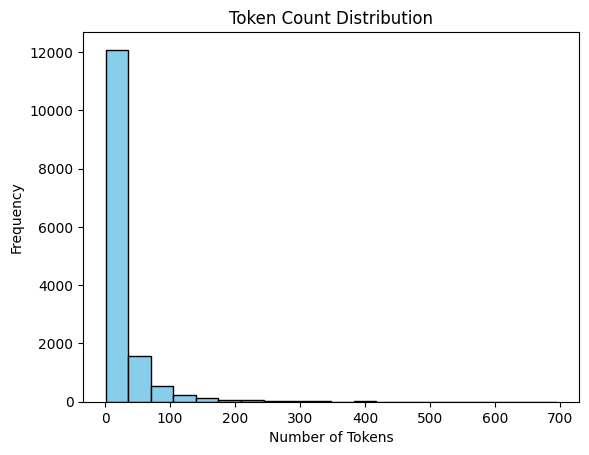

In [90]:
# Calculate token counts per document
df['Token_Count'] = df['Cleaned_Tokens'].apply(len)

# Display summary statistics
print(df['Token_Count'].describe())

# Plot token count distribution
import matplotlib.pyplot as plt

plt.hist(df['Token_Count'], bins=20, color='skyblue', edgecolor='black')
plt.title("Token Count Distribution")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

In [91]:
from gensim.models import LdaModel

# Define number of topics
num_topics = 5

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics with keywords
print("Topics and their keywords:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")

Topics and their keywords:
Topic 1: 0.037*"Israel" + 0.031*"Hamas" + 0.016*"Gaza" + 0.014*"people" + 0.013*"war" + 0.012*"civilian" + 0.008*"kill" + 0.008*"Palestinians" + 0.007*"like" + 0.007*"attack"
Topic 2: 0.021*"Jews" + 0.020*"Israel" + 0.019*"people" + 0.017*"Palestinians" + 0.016*"state" + 0.014*"right" + 0.014*"country" + 0.014*"jewish" + 0.013*"land" + 0.012*"palestinian"
Topic 3: 0.028*"delete" + 0.010*"ideology" + 0.009*"culture" + 0.009*"gay" + 0.008*"bank" + 0.007*"historical" + 0.007*"zionism" + 0.007*"datum" + 0.006*"identity" + 0.006*"God"
Topic 4: 0.012*"child" + 0.011*"israeli" + 0.010*"want" + 0.009*"woman" + 0.009*"genocide" + 0.008*"say" + 0.007*"Israel" + 0.007*"Palestinians" + 0.007*"people" + 0.007*"kill"
Topic 5: 0.019*"people" + 0.015*"pro" + 0.012*"like" + 0.010*"think" + 0.009*"post" + 0.008*"know" + 0.008*"see" + 0.007*"say" + 0.007*"thing" + 0.007*"support"


In [92]:
# Define number of topics
num_topics = 10

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Display topics with keywords
print("Topics and their keywords:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx + 1}: {topic}")

Topics and their keywords:
Topic 1: 0.053*"Jews" + 0.039*"jewish" + 0.018*"state" + 0.018*"land" + 0.015*"anti" + 0.014*"Arabs" + 0.014*"arab" + 0.013*"remove" + 0.010*"hate" + 0.010*"left"
Topic 2: 0.057*"Gaza" + 0.028*"Israel" + 0.021*"tunnel" + 0.018*"aid" + 0.017*"water" + 0.012*"Egypt" + 0.012*"destroy" + 0.011*"food" + 0.010*"border" + 0.008*"damage"
Topic 3: 0.021*"war" + 0.019*"Israel" + 0.016*"people" + 0.010*"like" + 0.010*"country" + 0.009*"think" + 0.008*"genocide" + 0.007*"conflict" + 0.007*"good" + 0.007*"know"
Topic 4: 0.052*"Hamas" + 0.042*"Israel" + 0.029*"civilian" + 0.022*"Gaza" + 0.021*"kill" + 0.012*"attack" + 0.012*"child" + 0.010*"israeli" + 0.010*"terrorist" + 0.010*"death"
Topic 5: 0.038*"people" + 0.037*"Israel" + 0.022*"Palestinians" + 0.020*"want" + 0.015*"support" + 0.014*"right" + 0.014*"think" + 0.013*"like" + 0.012*"Hamas" + 0.011*"peace"
Topic 6: 0.034*"Palestinians" + 0.033*"West" + 0.026*"state" + 0.025*"Bank" + 0.023*"palestinian" + 0.018*"Lebanon" +

In [93]:
# Function to get the dominant topic for each document
def get_dominant_topic(lda_model, corpus):
    dominant_topics = []
    for row in lda_model[corpus]:
        row = sorted(row, key=lambda x: x[1], reverse=True)
        dominant_topics.append(row[0][0])  # Get the topic with the highest weight
    return dominant_topics

# Assign dominant topics to the dataset
df['Dominant_Topic'] = get_dominant_topic(lda_model, corpus)

# View the updated DataFrame
print(df[['Comment_Text', 'Dominant_Topic']].head())

                                        Comment_Text  Dominant_Topic
0  As per CNN\n\nIsraeli Prime Minister Benjamin ...               1
1  What’s the long game here?(3ish weeks) does Is...               1
2  Good job to U.S. diplomats for changing Isreal...               2
3  The US is in a crucial position to advance the...               3
4  Everybody hates the United States until it’s t...               5


In [94]:
# pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 9.2 MB/s eta 0:00:00


In [95]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the LDA visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(lda_vis)